In [1]:
import anndata as ad
import scanpy as sc
import gc
import sys
import cellanova as cnova
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from metrics import calculate_metrics

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R


/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


In [2]:
def plot_cellanova(adata, cell_type_key, batch_key, condition_key, dataset_name):
    adata.raw = None
    print("adata preprocessing...")

    import warnings
    warnings.filterwarnings("ignore")
    warnings.filterwarnings("ignore", category=FutureWarning)

    if isinstance(batch_key, str):
        batch_key = [batch_key]

    batch_all = []
    for i in range(adata.shape[0]):
        tmp = "__".join([adata.obs[batch_keyj][i] for batch_keyj in batch_key])
        batch_all.append(tmp)
    batch_all = np.array(batch_all)
    adata.obs["batch_all"] = batch_all
    adata.obs["batch_all"] = adata.obs["batch_all"].astype("category")
    print("batch_all", np.unique(batch_all))

    batch_all_with_condition = []
    for i in range(adata.shape[0]):
        tmp = "__".join([adata.obs[batch_keyj][i] for batch_keyj in batch_key])
        tmp = tmp + "__" + adata.obs[condition_key][i]
        batch_all_with_condition.append(tmp)
    batch_all_with_condition = np.array(batch_all_with_condition)
    adata.obs["batch_all_with_condition"] = batch_all_with_condition
    adata.obs["batch_all_with_condition"] = adata.obs["batch_all_with_condition"].astype("category")
    print("batch_all_with_condition", np.unique(batch_all_with_condition))

    batch_key.append("batch_all")
    batch_key.append("batch_all_with_condition")

    main_effect_adata = ad.AnnData(adata.layers['main_effect'], dtype=np.float32)
    main_effect_adata.var_names = adata.var_names
    main_effect_adata.obs = adata.obs.copy()

    integrated = ad.AnnData(adata.layers['denoised'], dtype=np.float32)
    integrated.obs = adata.obs.copy()
    integrated.var_names = adata.var_names

    print("Plot of main effect:")
    if main_effect_adata.shape[1] > 60:
        sc.pp.pca(main_effect_adata)
    sc.pp.neighbors(main_effect_adata, n_neighbors=15)
    sc.tl.umap(main_effect_adata)
    for colori in [cell_type_key, condition_key] + batch_key:
        sc.pl.umap(main_effect_adata, color=colori, ncols=1)

    print("Plot of denoised expression")
    sc.pp.pca(integrated)
    sc.pp.neighbors(integrated, n_neighbors=15)
    sc.tl.umap(integrated)
    for colori in [cell_type_key, condition_key] + batch_key:
        sc.pl.umap(integrated, color=colori, ncols=1)

    print("Within each unique condition, plot main effect")
    unique_conditions = np.unique(np.array(integrated.obs[condition_key]))
    for conditioni in unique_conditions:
        print("Now evaluating", conditioni, "main effect")
        main_effect_adatai = main_effect_adata[main_effect_adata.obs[condition_key] == conditioni]
        for colori in [cell_type_key] + batch_key:
            sc.pl.umap(main_effect_adatai, color=colori, ncols=1)
        print("-" * 20)

    print("Within each unique condition, plot denoised expression")
    unique_conditions = np.unique(np.array(integrated.obs[condition_key]))
    for conditioni in unique_conditions:
        print("Now evaluating", conditioni, "denoised expression")
        integratedi = integrated[integrated.obs[condition_key] == conditioni]
        for colori in [cell_type_key] + batch_key:
            sc.pl.umap(integratedi, color=colori, ncols=1)
        print("-" * 20)

# Type 1 diabetes

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148073

In [ ]:
adata=sc.read_h5ad("./cellanova/t1d_results.h5ad")
plot_cellanova(adata=adata,cell_type_key="cell_type",batch_key="donor_id",
                   condition_key="disease_state",dataset_name="t1d")

# Human kidney multiomics atlas

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE211785

adata preprocessing...
batch_all ['HK1584__SC_RNA' 'HK1585__SC_RNA' 'HK1588__SC_RNA' 'HK1593__SC_RNA'
 'HK1594__SC_RNA' 'HK1597__SC_RNA' 'HK1632__SC_RNA' 'HK1634__SC_RNA'
 'HK1635__SC_RNA' 'HK1650__SC_RNA' 'HK1664__SC_RNA' 'HK1770__SC_RNA'
 'HK1997__SC_RNA' 'HK2558__SN_RNA' 'HK2596__SN_RNA' 'HK2662__SC_RNA'
 'HK2663__SN_RNA' 'HK2711__SN_RNA' 'HK2713__SC_RNA' 'HK2739__SN_RNA'
 'HK2770__SC_RNA' 'HK2770__SN_RNA' 'HK2774__SC_RNA' 'HK2774__SN_RNA'
 'HK2833__SC_RNA' 'HK2833__SN_RNA' 'HK2844__SN_RNA' 'HK2862__SN_RNA'
 'HK2867__SC_RNA' 'HK2867__SN_RNA' 'HK2868__SN_RNA' 'HK2891__SC_RNA'
 'HK2891__SN_RNA' 'HK2893__SC_RNA' 'HK2893__SN_RNA' 'HK2895__SC_RNA'
 'HK2895__SN_RNA' 'HK2896__SC_RNA' 'HK2898__SN_RNA' 'HK2899__SC_RNA'
 'HK2899__SN_RNA' 'HK2923__SC_RNA' 'HK2924__SC_RNA' 'HK2976__SN_RNA']
batch_all_with_condition ['HK1584__SC_RNA__Disease' 'HK1585__SC_RNA__Control'
 'HK1588__SC_RNA__Control' 'HK1593__SC_RNA__Disease'
 'HK1594__SC_RNA__Disease' 'HK1597__SC_RNA__Disease'
 'HK1632__SC_RNA__Disea

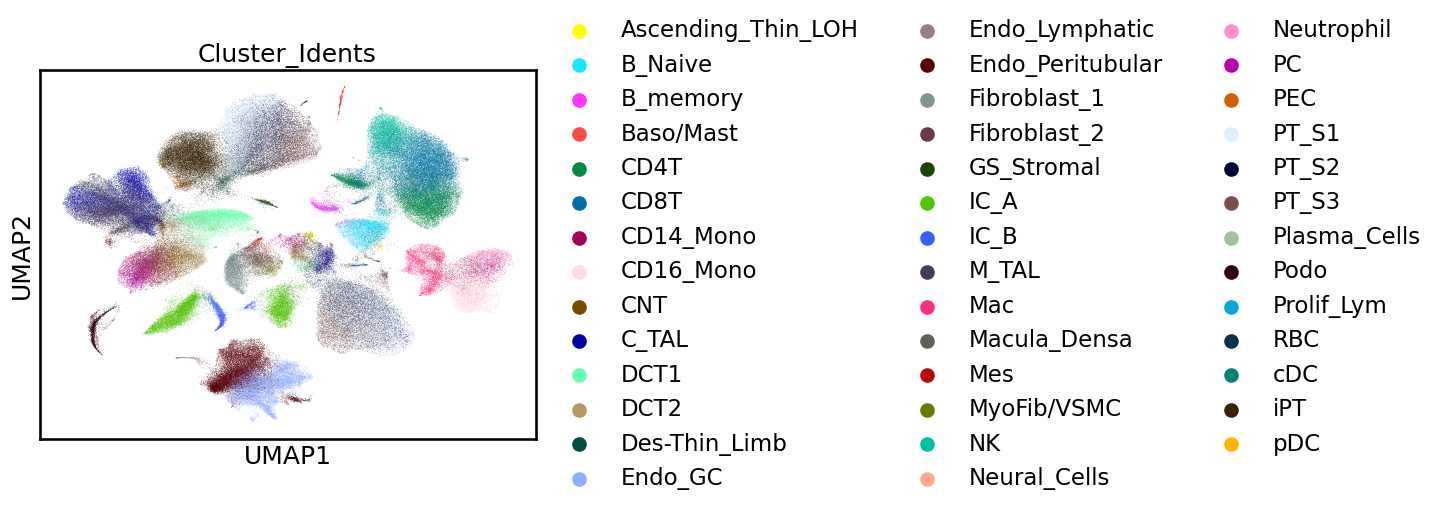

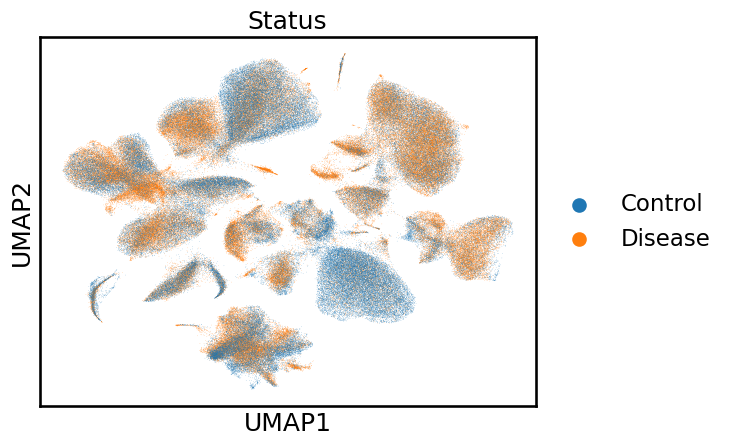

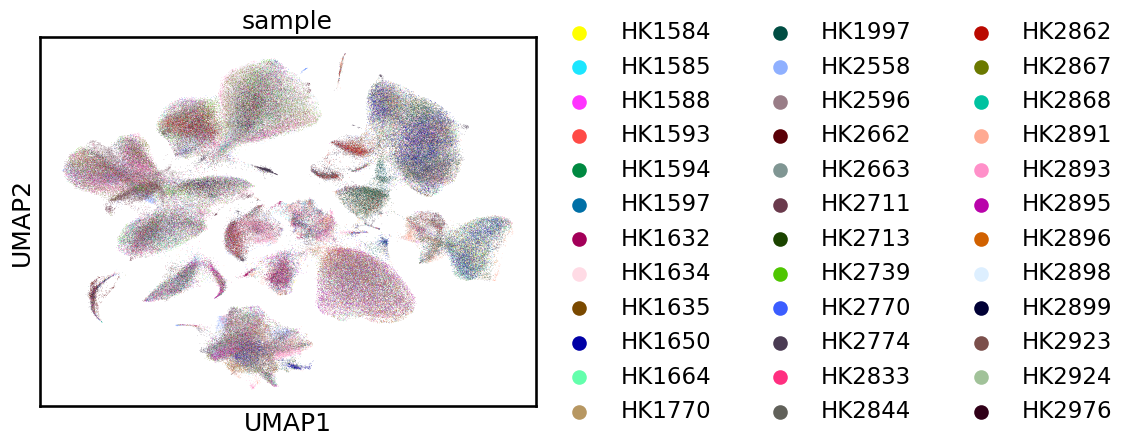

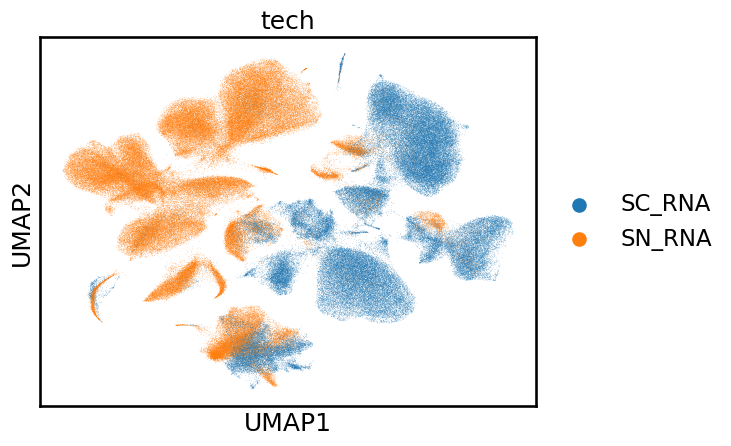

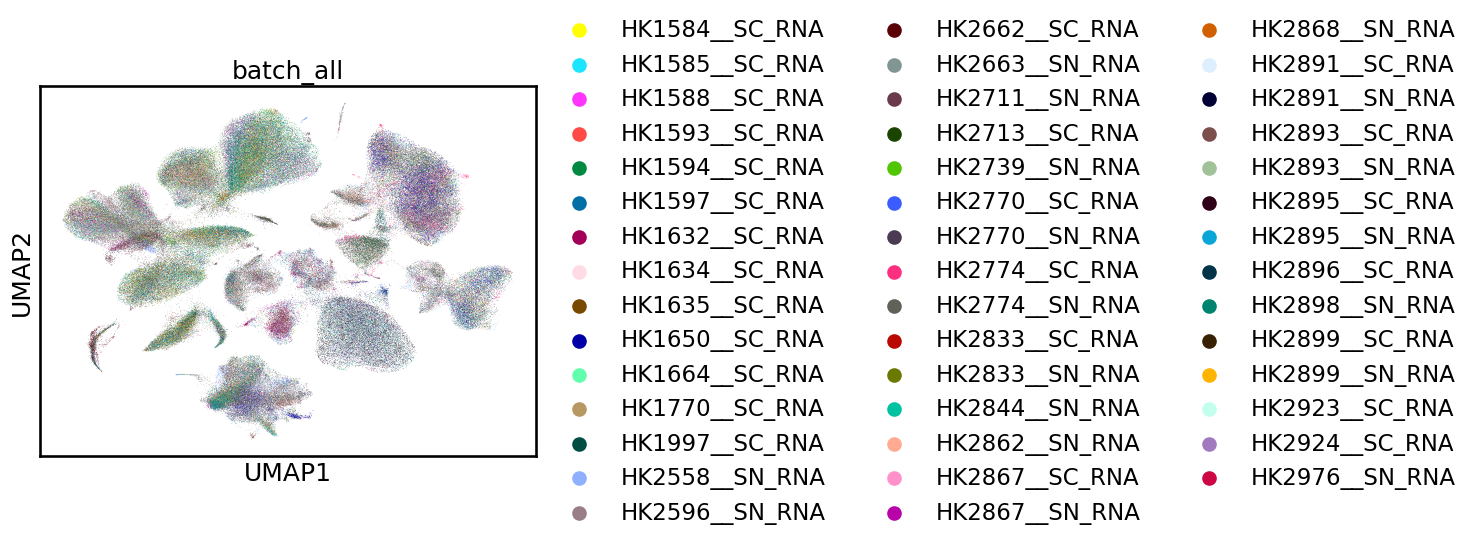

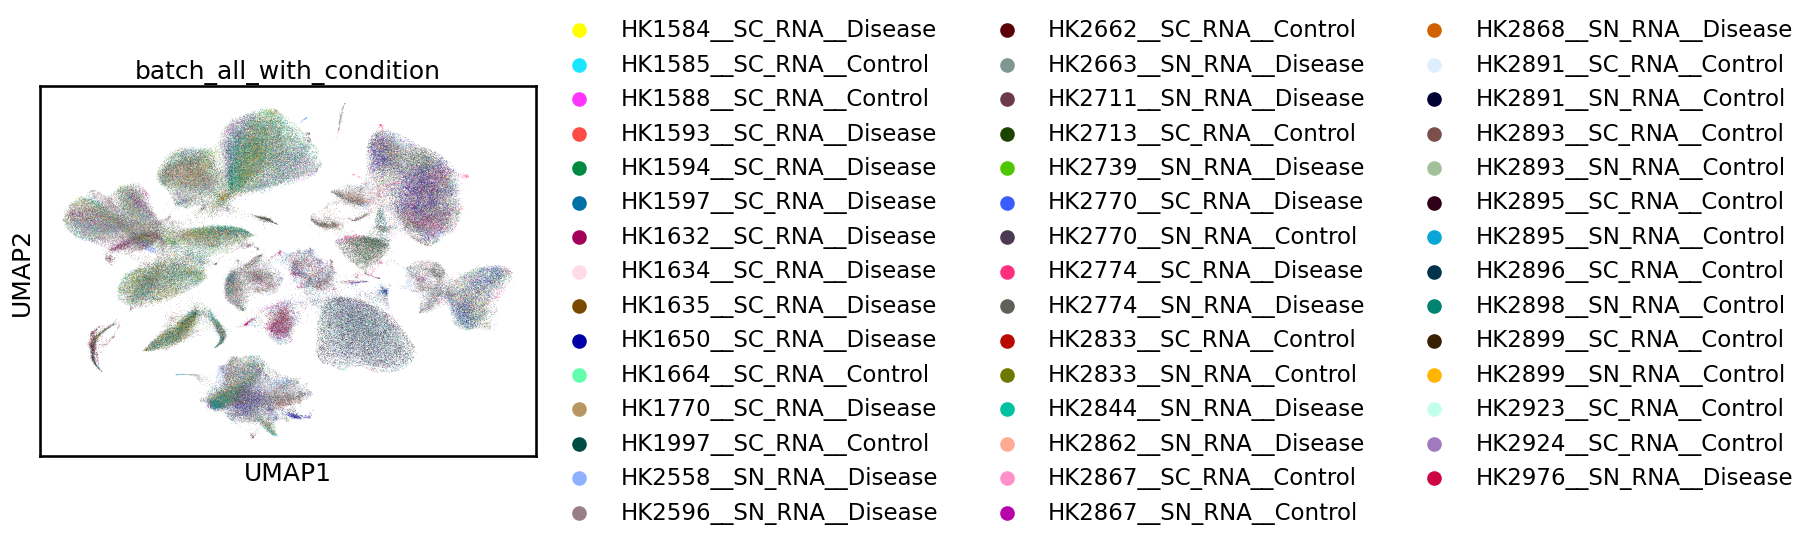

Plot of denoised expression


KeyboardInterrupt: 

In [3]:
adata=sc.read_h5ad("./cellanova/kidney_results.h5ad")
plot_cellanova(adata=adata,cell_type_key='Cluster_Idents',batch_key=['sample','tech'],
                   condition_key="Status",dataset_name="kidney")

In [4]:
adata=sc.read_h5ad("./cellanova/kidney_results.h5ad")

integrated = ad.AnnData(adata.layers['denoised'], dtype=np.float32)
integrated.obs = adata.obs.copy()
integrated.var_names = adata.var_names

sc.pp.pca(integrated)
sc.pp.neighbors(integrated, n_neighbors=15)
sc.tl.umap(integrated)

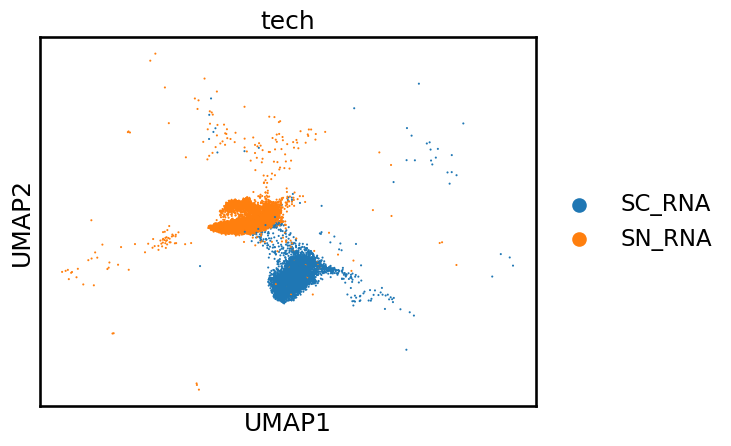

In [5]:
sc.pl.umap(integrated[integrated.obs['Cluster_Idents']=="IC_A"], color="tech", ncols=1)

# Mouse radiation experiment dataset

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE280883

In [ ]:
adata=sc.read_h5ad("./cellanova/mouse_results.h5ad")
plot_cellanova(adata=adata,cell_type_key='compartment',batch_key=['orig.ident',"replicate","source"],
                   condition_key="sample",dataset_name="mouse")